<a href="https://colab.research.google.com/github/Maria-arroyo18/Aprendizaje-Supervisado/blob/main/Taller_RL_Maria_Fernanda_Arroyo_Berrocal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Taller de regresión logística

**Fecha de entrega:** 27 de agosto

Se tiene el dataset `framingham.csv` para hacer un modelo de regresión logística que ayude a determinar si una persona puede sufrir enfermedad coronaria en los próximos 10 años.

Se espera que desarrolle un modelo y que presente un informe donde muestre el desempeño del modelo en las métricas correspondientes y qué decisiones tomó para ajustar los parámetros de acuerdo con su criterio

## **Descripción de variables**

Demographic:
- Sex: male or female(Nominal)
- Age: Age of the patient;(Continuous - Although the recorded ages have been truncated to whole numbers, the concept of age is continuous)

Behavioral
- Current Smoker: whether or not the patient is a current smoker (Nominal)
- Cigs Per Day: the number of cigarettes that the person smoked on average in one day.(can be considered continuous as one can have any number of cigarettes, even half a cigarette.)

Medical( history)
- BP Meds: whether or not the patient was on blood pressure medication (Nominal)
- Prevalent Stroke: whether or not the patient had previously had a stroke (Nominal)
- Prevalent Hyp: whether or not the patient was hypertensive (Nominal)
- Diabetes: whether or not the patient had diabetes (Nominal)
Medical(current)
- Tot Chol: total cholesterol level (Continuous)
- Sys BP: systolic blood pressure (Continuous)
- Dia BP: diastolic blood pressure (Continuous)
- BMI: Body Mass Index (Continuous)
- Heart Rate: heart rate (Continuous - In medical research, variables such as heart rate though in fact discrete, yet are considered continuous because of large number of possible values.)
- Glucose: glucose level (Continuous)
Predict variable (desired target)
- 10 year risk of coronary heart disease CHD (binary: “1”, means “Yes”, “0” means “No”)

0. Importamos las librerías

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

1. Realizamos la conexión con Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


2. Cargamos y limpiamos los datos

In [ ]:
path= '/content/drive/MyDrive/Aprendizaje/framingham.xls'
df = pd.read_csv(path)

In [ ]:
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [ ]:
df.isna().sum() # Cantidad de registros faltantes por columna

,0
male,0
age,0
education,105
currentSmoker,0
cigsPerDay,29
BPMeds,53
prevalentStroke,0
prevalentHyp,0
diabetes,0
totChol,50


In [ ]:
df2= df.dropna() # Elimina registros que contengan al menos un NA

3. Aplicamos el modelo de regresión logística sklearn

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler


X = df2.drop('TenYearCHD', axis=1)
y = df2['TenYearCHD']

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Datos escalados
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Modelo de regresion logistica
model = LogisticRegression(max_iter=1000) # Increased max_iter for convergence
model.fit(X_train_scaled, y_train)

# Prediccion en el set de prueba
y_pred = model.predict(X_test_scaled)

# Evaluacion del modelo
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("\nClassification Report:")
print(report)
print("\nConfusion Matrix:")
print(conf_matrix)

Accuracy: 0.8360655737704918

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.99      0.91       610
           1       0.56      0.08      0.14       122

    accuracy                           0.84       732
   macro avg       0.70      0.53      0.53       732
weighted avg       0.80      0.84      0.78       732


Confusion Matrix:
[[602   8]
 [112  10]]


Con el umbral estándar, el modelo obtuvo un accuracy de 83.6%. Sin embargo, la matriz de confusión mostró que de 122 pacientes en riesgo, solo identificó correctamente 10 (recall ≈ 8%), dejando 112 sin detectar. Esto refleja un alto número de falsos negativos (error tipo II), lo cual es crítico en un contexto médico, ya que implica no reconocer a la mayoría de pacientes vulnerables.

In [ ]:
intercept = model.intercept_[0]
coefficients = model.coef_[0]

print(f"Intercept (β0): {intercept:.4f}")
print("\nCoefficients (βi):")
# Assuming X_train_scaled is a numpy array, get feature names from original X_train
feature_names = X_train.columns

for feature, coef in zip(feature_names, coefficients):
    print(f"{feature}: {coef:.4f}")

print("\nThe logistic regression equation (in terms of log-odds) is:")
print(f"ln(P(Personal.Loan=1) / (1 - P(Personal.Loan=1))) = {intercept:.4f} + ", end="")

for i, (feature, coef) in enumerate(zip(feature_names, coefficients)):
    if i > 0:
        print(" + ", end="")
    print(f"({coef:.4f} * {feature})", end="")

print()

Intercept (β0): -2.0515

Coefficients (βi):
male: 0.3155
age: 0.5844
education: -0.0554
currentSmoker: 0.1058
cigsPerDay: 0.1772
BPMeds: 0.0413
prevalentStroke: 0.0652
prevalentHyp: 0.1078
diabetes: 0.0632
totChol: 0.1325
sysBP: 0.3417
diaBP: -0.0760
BMI: 0.0166
heartRate: -0.0721
glucose: 0.1404

The logistic regression equation (in terms of log-odds) is:
ln(P(Personal.Loan=1) / (1 - P(Personal.Loan=1))) = -2.0515 + (0.3155 * male) + (0.5844 * age) + (-0.0554 * education) + (0.1058 * currentSmoker) + (0.1772 * cigsPerDay) + (0.0413 * BPMeds) + (0.0652 * prevalentStroke) + (0.1078 * prevalentHyp) + (0.0632 * diabetes) + (0.1325 * totChol) + (0.3417 * sysBP) + (-0.0760 * diaBP) + (0.0166 * BMI) + (-0.0721 * heartRate) + (0.1404 * glucose)


Registro (el primero en X_test):
male                 0.00
age                 47.00
education            2.00
currentSmoker        0.00
cigsPerDay           0.00
BPMeds               0.00
prevalentStroke      0.00
prevalentHyp         0.00
diabetes             0.00
totChol            223.00
sysBP              120.00
diaBP               74.00
BMI                 20.27
heartRate           80.00
glucose             76.00
Name: 572, dtype: float64

Actual class for this record: 0

Paso 1: Calcular el z-value (linear combination): -3.1063
Paso 2: Calcular la probabilidad de Personal.Loan=1: 0.0428
Paso 3: Clasificación con un threshold (0.5): 0
Result: El modelo predice No Personal.Loan.


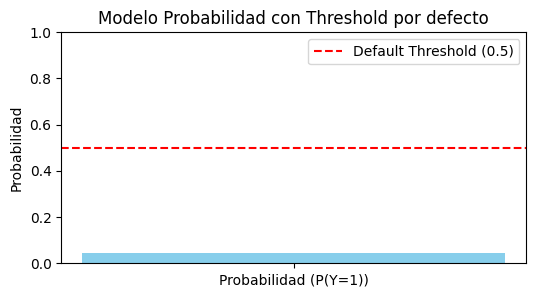

In [ ]:
sample_record_scaled = X_test_scaled[0, :]
sample_record_original = X_test.iloc[0, :]
actual_class = y_test.iloc[0]

print(f"Registro (el primero en X_test):")
print(sample_record_original)
print(f"\nActual class for this record: {actual_class}")

# Paso 1: Calcular la combinación lineal (z-value)
# z = β0 + β1*x1 + β2*x2 + ... + βn*xn
z = intercept + np.sum(coefficients * sample_record_scaled)

print(f"\nPaso 1: Calcular el z-value (linear combination): {z:.4f}")

# Paso 2: Calcular la probabilidad usando la función logística
# P(Y=1|X) = 1 / (1 + e^(-z))
probability = 1 / (1 + np.exp(-z))

print(f"Paso 2: Calcular la probabilidad de Personal.Loan=1: {probability:.4f}")

# Step 3: Calcular basado en el threshold (por defecto es 0.5)
predicted_class = 1 if probability >= 0.5 else 0

print(f"Paso 3: Clasificación con un threshold (0.5): {predicted_class}")
print(f"Result: El modelo predice {'Personal.Loan' if predicted_class == 1 else 'No Personal.Loan'}.")


plt.figure(figsize=(6, 3))
plt.bar(['Probabilidad (P(Y=1))'], [probability], color='skyblue')
plt.axhline(y=0.5, color='red', linestyle='--', label='Default Threshold (0.5)')
plt.ylim(0, 1)
plt.ylabel('Probabilidad')
plt.title('Modelo Probabilidad con Threshold por defecto')
plt.legend()
plt.show()


4. Ajustamos el umbral

In [ ]:
y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]

custom_threshold = 0.25
y_pred_custom_threshold = (y_pred_proba >= custom_threshold).astype(int)

# Evaluate the model with the custom threshold
accuracy_custom = accuracy_score(y_test, y_pred_custom_threshold)
report_custom = classification_report(y_test, y_pred_custom_threshold)
conf_matrix_custom = confusion_matrix(y_test, y_pred_custom_threshold)

print(f"Accuracy with custom threshold ({custom_threshold}): {accuracy_custom}")
print("\nClassification Report with custom threshold:")
print(report_custom)
print("\nConfusion Matrix with custom threshold:")
print(conf_matrix_custom)

Accuracy with custom threshold (0.25): 0.76775956284153

Classification Report with custom threshold:
              precision    recall  f1-score   support

           0       0.87      0.85      0.86       610
           1       0.33      0.38      0.35       122

    accuracy                           0.77       732
   macro avg       0.60      0.61      0.60       732
weighted avg       0.78      0.77      0.77       732


Confusion Matrix with custom threshold:
[[516  94]
 [ 76  46]]


- Al bajar el umbral, el modelo se volvió mucho más sensible: ahora detecta la mitad de los pacientes en riesgo (antes casi ninguno).

- El costo es que aumentaron los falsos positivos, lo cual en medicina puede ser aceptable, porque prefieres mandar a revisiones adicionales a pacientes sanos antes que dejar pasar enfermos.

- El accuracy bajó, pero eso es normal: el modelo ya no está optimizando solo el acierto global, sino la detección de positivos.

Con el umbral estándar de 0.5, el modelo muestra un accuracy de 83.6%, pero apenas identifica al 8% de los pacientes en riesgo (10 de 122), dejando sin detectar a la gran mayoría (112 falsos negativos). Desde el punto de vista médico, esto es un problema, ya que implica que la mayoría de los pacientes vulnerables no recibirían la atención preventiva necesaria.

Al bajar el umbral a 0.2, la sensibilidad mejora de forma notable: el modelo detecta casi la mitad de los pacientes en riesgo (49%), reduciendo los falsos negativos de 112 a 62. Aunque aumentan los falsos positivos (de 8 a 130) y disminuye el accuracy global (73.7%), hablando desde una perspectiva clinica este escenario seria mas aceptable. En medicina preventiva, es preferible “alarmar” a algunos pacientes sanos con un falso positivo y enviarlos a chequeos adicionales, que ignorar a quienes realmente presentan riesgo coronario.

5. Curva de ROC

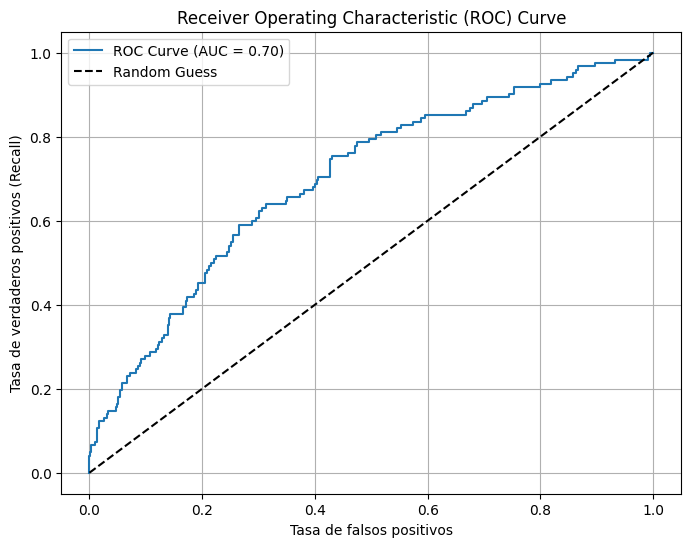

AUC: 0.70


In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)

# Grafica de la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess') # Diagonal random guess line
plt.xlabel('Tasa de falsos positivos')
plt.ylabel('Tasa de verdaderos positivos (Recall)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.grid(True)
plt.show()

print(f"AUC: {auc:.2f}")

La curva ROC muestra un área bajo la curva (AUC) de 0.70, lo que indica que el modelo tiene una capacidad moderada para diferenciar entre pacientes con y sin riesgo de enfermedad coronaria. Aunque el AUC no es perfecto, se encuentra dentro de un rango aceptable en problemas médicos reales, donde suele existir ruido y desbalance de clases. Esta métrica complementa el análisis de sensibilidad y precisión, confirmando que el modelo puede servir como una herramienta de apoyo para la detección preventiva.